# WhipMy Language
## Базовые примеры AI моделей, которые могут быть использованы для расширения.
## Умный помощник для изучения иностранных языков - учись вместе с основной работой, чтением книг, статей, практикуй.

Our cute little whippet WhipMy is always at your screen (optional) ready to play or bring your slippers… To start learning just push WhipMy, choose language, highlight any part of text you work on and enjoy learning... WhipMy illustrates the text, translates it highlightihg key words in bouth texts, reads it for you, listens how you read it (optional). Gives description to key words. Gives grammar reference and exercises to practice (related words and grammar from the same topic) using game-based methods and tests. Remembers mistakes, gives grammar excercises till they`re done several times without mistakes. At the end of the day WhipMy sends you a motivational report. While you don`t use WhipMy, little whippet changes his position sitting, laying, sprawling, sleeping and snoring, waiting for your attention.

In [1]:
import torch
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from tqdm import tqdm
from collections import Counter

# Иллюстрация текста. В качестве примера - предобученная модель для генерации картинки по выделенному тексту

In [2]:
# !pip install diffusers

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [4]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("openskyml/lexica-aperture-v3-5").to(device)

2024-02-28 10:53:05.145673: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-28 10:53:05.522095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 10:53:05.522198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 10:53:05.583088: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 10:53:05.691759: I tensorflow/core/platform/cpu_feature_guar

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [5]:
# Run the attention ops without SDPA.
pipeline.unet.set_default_attn_processor()
pipeline.vae.set_default_attn_processor()

In [14]:
prompt = "Whippet is running, Vincent van Gogh style, muted colors, detailed, 8k"
image = pipeline(prompt, num_inference_steps=30).images[0]


  0%|          | 0/30 [00:00<?, ?it/s]

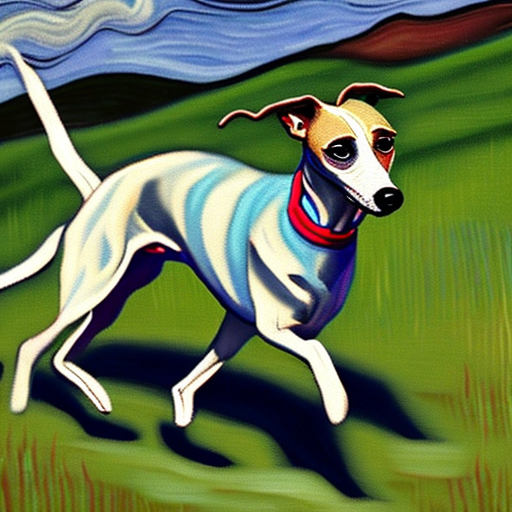

In [18]:
image

In [19]:
image.save("whippet2.jpg") 

In [10]:
text = 'Humpty Dumpty sat on a wall. Humpty Dumpty had a great fall. All the king’s horses and all the king’s men couldn’t put Humpty together again'

In [11]:
prompt1 = text.split('.')[0]
prompt1 = prompt1 + ' ' +' Vincent van Gogh style, cold color palette, muted colors, detailed, 8k'

In [12]:
image1 = pipeline(prompt1, num_inference_steps=30).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

### Пример иллюстрации сгенерирован нейросетью

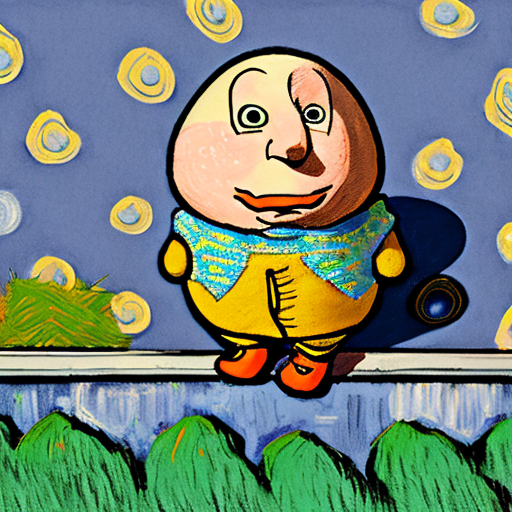

In [13]:
image1 

In [17]:
image1.save('HumptyDumpty1.jpg')

In [20]:
prompt2 = "Logo with whippet`s face, Vincent van Gogh style, muted colors, green, red, white, detailed, 8k"
image2 = pipeline(prompt2, num_inference_steps=30).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

### Пример логотипа сгенерирован нейросетью

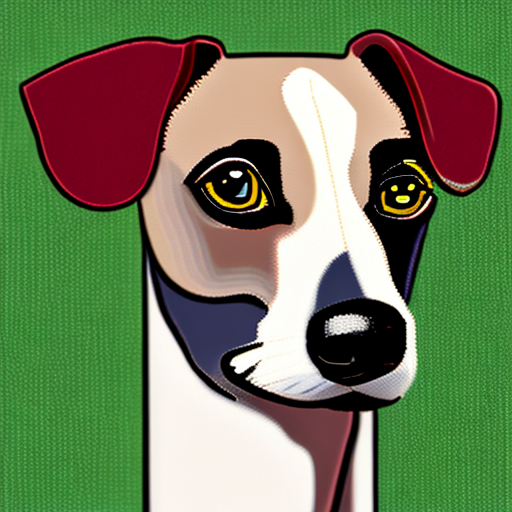

In [21]:
image2

In [23]:
image2.save('logo_whippet.jpg')# пример логотипа сгенерирован нейросетью

### Пример картинки WhipMy на экране сгенерирован нейросетью

In [6]:
prompt3 = "Whippet, Vincent van Gogh style, red, detailed, 8k"
image3 = pipeline(prompt3, num_inference_steps=30).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

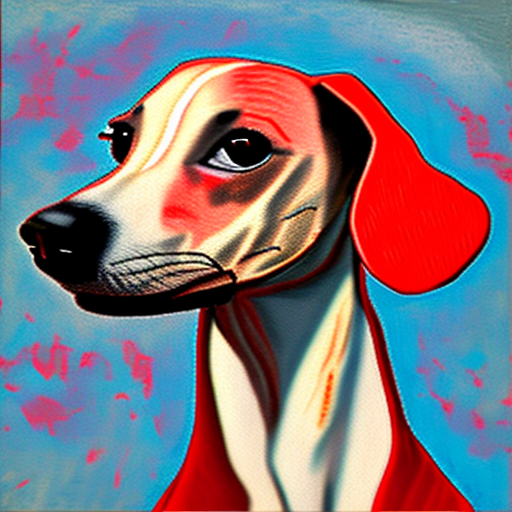

In [7]:
image3.save('screen_whippet.jpg')
image3

### Для целей WhipMy необходимо дообучить данную модель на картинках с более подходящим стилем.

# Перевод выделенного текста. Пример предобученной модели.

In [8]:
from transformers import pipeline

pipe = pipeline("translation", model="google-t5/t5-small")

/home/ekaterina/anaconda3/lib/python3.9/site-packages/transformers/pipelines/__init__.py:1049: UserWarning: "translation" task was used, instead of "translation_XX_to_YY", defaulting to "translation_en_to_de"
  warnings.warn(


In [9]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google-t5/t5-small")
model = T5ForConditionalGeneration.from_pretrained("google-t5/t5-small")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [10]:
input_ids = tokenizer("translate English to French: The house is wonderful.", return_tensors="pt").input_ids
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

La maison est merveilleuse.


/home/ekaterina/anaconda3/lib/python3.9/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [11]:
def translate_phrase(phrase, language = 'French'):
    phrase = 'translate English to ' + language + ': '+ phrase
    input_ids = tokenizer(phrase, return_tensors="pt").input_ids
    outputs = model.generate(input_ids)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

## Пример перевода текста с английского на французский

In [12]:
translate_phrase('Whip your language skills')

'Vous avez l’habitude de s’adonner à vos compétences'

## WhipMy - образовательное расширение для Chrome. Для касчественного перевода следует воспользоваться переводчиком не ниже уровня DeepL.

# Пример модели классификатора для поиска грамматических конструкций в тексте пользователя.

Обучение модели будет производиться на базе матрицы Примеры предложений (с маской POS) - грамматические разделы. Примеры грамматических тем для английского языка https://www.native-english.ru/grammar, для русского языка https://reallanguage.club/grammatika-russkogo-yazyka/

## Рассмотрим создание матрицы на русском языке

## Создадим пример датасета для обучения поиску грамматических тем с маской POS 

### Темы грамматических конструкций взяли с сайта  https://reallanguage.club/grammatika-russkogo-yazyka/. При обучении модели следует брать разделы тем и правил из пособий по изучению иностранного языка для не носителей.

In [13]:
#nltk.download() 
import nltk
from nltk.tokenize import word_tokenize
import matplotlib
%matplotlib inline

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
nltk.help.upenn_tagset('RB')
nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('VB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [16]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pyconll
import nltk
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
from nltk.tag import DefaultTagger, UnigramTagger, BigramTagger, TrigramTagger

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
import os
import corus
import deeppavlov
from deeppavlov import configs, build_model
import spacy
from spacy import displacy
import ru_core_news_sm
import pandas as pd
from navec import Navec
from slovnet import NER
from ipymarkup import show_span_ascii_markup as show_markup
from razdel import tokenize
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.metrics import f1_score

[nltk_data] Downloading package punkt to /home/ekaterina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/ekaterina/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/ekaterina/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ekaterina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
!wget -O ru_syntagrus-ud-train.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-a.conllu
!wget -O ru_syntagrus-ud-dev.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu

/bin/bash: /home/ekaterina/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2024-02-28 10:53:51--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-a.conllu
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 40736599 (39M) [text/plain]
Сохранение в: «ru_syntagrus-ud-train.conllu»

ru_syntagrus-ud-tra 100%[===================>]  38,85M  3,17MB/s    за 1m 42s  

2024-02-28 10:55:35 (389 KB/s) - «ru_syntagrus-ud-train.conllu» сохранён [40736599/40736599]

/bin/bash: /home/ekaterina/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2024-02-28 10:55:36--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-

In [18]:
import pyconll

In [19]:
# Загружаем данные
data_train = pyconll.load_from_file('ru_syntagrus-ud-train.conllu')
data_test = pyconll.load_from_file('ru_syntagrus-ud-dev.conllu')

In [20]:
fdata_train = []
for sent in data_train[:]:
    fdata_train.append([(token.form, token.upos) for token in sent])
    
fdata_test = []
for sent in data_test[:]:
    fdata_test.append([(token.form, token.upos) for token in sent])
    
fdata_sent_test = []
for sent in data_test[:]:
    fdata_sent_test.append([token.form for token in sent])

In [21]:
fdata_train[:10]

[[('Анкета', 'NOUN'), ('.', 'PUNCT')],
 [('Начальник', 'NOUN'),
  ('областного', 'ADJ'),
  ('управления', 'NOUN'),
  ('связи', 'NOUN'),
  ('Семен', 'PROPN'),
  ('Еремеевич', 'PROPN'),
  ('был', 'AUX'),
  ('человек', 'NOUN'),
  ('простой', 'ADJ'),
  (',', 'PUNCT'),
  ('приходил', 'VERB'),
  ('на', 'ADP'),
  ('работу', 'NOUN'),
  ('всегда', 'ADV'),
  ('вовремя', 'ADV'),
  (',', 'PUNCT'),
  ('здоровался', 'VERB'),
  ('с', 'ADP'),
  ('секретаршей', 'NOUN'),
  ('за', 'ADP'),
  ('руку', 'NOUN'),
  ('и', 'CCONJ'),
  ('иногда', 'ADV'),
  ('даже', 'PART'),
  ('писал', 'VERB'),
  ('в', 'ADP'),
  ('стенгазету', 'NOUN'),
  ('заметки', 'NOUN'),
  ('под', 'ADP'),
  ('псевдонимом', 'NOUN'),
  ('"', 'PUNCT'),
  ('Муха', 'NOUN'),
  ('"', 'PUNCT'),
  ('.', 'PUNCT')],
 [('В', 'ADP'),
  ('приемной', 'NOUN'),
  ('его', 'PRON'),
  ('с', 'ADP'),
  ('утра', 'NOUN'),
  ('ожидали', 'VERB'),
  ('посетители', 'NOUN'),
  (',', 'PUNCT'),
  ('-', 'PUNCT'),
  ('кое-кто', 'PRON'),
  ('с', 'ADP'),
  ('важными', 'ADJ'),

In [22]:
default_tagger = nltk.DefaultTagger('NN')
default_acc = default_tagger.evaluate(fdata_test)

unigram_tagger = UnigramTagger(fdata_train)
unigram_acc = unigram_tagger.evaluate(fdata_test)

bigram_tagger = BigramTagger(fdata_train)
bigram_acc = bigram_tagger.evaluate(fdata_test)

trigram_tagger = TrigramTagger(fdata_train)
trigram_acc = trigram_tagger.evaluate(fdata_test)

bigram_tagger = BigramTagger(fdata_train, backoff=unigram_tagger)
bigram_unigram_acc = bigram_tagger.evaluate(fdata_test)

trigram_tagger = TrigramTagger(fdata_train, backoff=bigram_tagger)
trigram_bigram_unigram_acc = trigram_tagger.evaluate(fdata_test)

print(f'Accuracy:\nDefault Tagger: {round(default_acc, 3)},\nUnigram Tagger: {round(unigram_acc, 3)},\nBigram Tagger: {round(bigram_acc, 5)},\n'
      f'Trigram Tagger: {round(trigram_acc, 3)},\nBigram and Unigram Tagger: {round(bigram_unigram_acc, 5)},\n'
      f'Trigram, Bigram and Unigram Tagger: {round(trigram_bigram_unigram_acc, 5)},\n')

Accuracy:
Default Tagger: 0.0,
Unigram Tagger: 0.824,
Bigram Tagger: 0.60939,
Trigram Tagger: 0.178,
Bigram and Unigram Tagger: 0.82928,
Trigram, Bigram and Unigram Tagger: 0.82914,



In [23]:
def union_taggers(train_sents, tagger_classes, backoff=None): #объединение тэггеров
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff


backoff = DefaultTagger('NN') 
tag = union_taggers(fdata_train,  
                     [UnigramTagger, BigramTagger, TrigramTagger],  
                     backoff = backoff) 
  
tag.evaluate(fdata_test)

0.827905462595221

In [24]:
test_sent = 'Расширение для браузера' #пример

In [25]:
def tagger(sentence):
    return(tag.tag(sentence.lower().split()))

In [26]:
tagger('Расширение для браузера') # пример маски

[('расширение', 'NOUN'), ('для', 'ADP'), ('браузера', 'NOUN')]

In [27]:
# пример текста для обучения модели поиска грамматических конструкций
test_text = 'День занялся тусклый, серый. Тучи повисли низко, воздух был студеный – вот-вот выпадет снег. В комнату, где спал ребенок, вошла служанка и раздвинула шторы. Она по привычке окинула взглядом фасад дома напротив – оштукатуренный, с портиком – и подошла к детской кроватке. – Вставай, Фи́лип, – сказала она. Откинув одеяло, она взяла его на руки и снесла вниз. Он еще не совсем проснулся. – Тебя зовет мама. Отворив дверь в комнату на первом этаже, няня поднесла ребенка к постели, на которой лежала женщина. Это была его мать. Она протянула к мальчику руки, и он свернулся калачиком рядом с ней, не спрашивая, почему его разбудили. Женщина поцеловала его зажмуренные глаза и худенькими руками ощупала теплое тельце сквозь белую фланелевую ночную рубашку. Она прижала ребенка к себе. – Тебе хочется спать, детка? – спросила она. Голос у нее был такой слабый, что, казалось, он доносится откуда-то издалека. Мальчик не ответил и только сладко потянулся. Ему было хорошо в теплой, просторной постели, в нежных объятиях. Он попробовал стать еще меньше, сжался в комочек и сквозь сон ее поцеловал. Глаза его закрылись, и он крепко уснул. Доктор молча подошел к постели. – Дайте ему побыть со мной хоть немножко, – простонала она. Доктор не ответил и только строго на нее поглядел. Зная, что ей не позволят оставить ребенка, женщина поцеловала его еще раз, провела рукой по его телу; взяв правую ножку, она перебрала все пять пальчиков, а потом нехотя притронулась к левой ноге. Она заплакала.'

In [28]:
test_text_sentences = test_text.split('.') #разделили по предложениям

In [29]:
test_text_sentences = test_text_sentences[:-1]
test_text_sentences

['День занялся тусклый, серый',
 ' Тучи повисли низко, воздух был студеный – вот-вот выпадет снег',
 ' В комнату, где спал ребенок, вошла служанка и раздвинула шторы',
 ' Она по привычке окинула взглядом фасад дома напротив – оштукатуренный, с портиком – и подошла к детской кроватке',
 ' – Вставай, Фи́лип, – сказала она',
 ' Откинув одеяло, она взяла его на руки и снесла вниз',
 ' Он еще не совсем проснулся',
 ' – Тебя зовет мама',
 ' Отворив дверь в комнату на первом этаже, няня поднесла ребенка к постели, на которой лежала женщина',
 ' Это была его мать',
 ' Она протянула к мальчику руки, и он свернулся калачиком рядом с ней, не спрашивая, почему его разбудили',
 ' Женщина поцеловала его зажмуренные глаза и худенькими руками ощупала теплое тельце сквозь белую фланелевую ночную рубашку',
 ' Она прижала ребенка к себе',
 ' – Тебе хочется спать, детка? – спросила она',
 ' Голос у нее был такой слабый, что, казалось, он доносится откуда-то издалека',
 ' Мальчик не ответил и только сладко

In [30]:
test_text_sentences_POS = []
# функция для добавления маски POS (parts of speech) в предложения
for sent in test_text_sentences: 
    text_POS_mask = tagger(sent)
    text_list = []
    POS_mask_list = []
    for el in text_POS_mask:
        text_list.append(el[0])
        POS_mask_list.append(el[1])
    text_with_POS_mask = ' '.join(text_list + POS_mask_list)
    test_text_sentences_POS.append(text_with_POS_mask)
print(test_text_sentences_POS)

['день занялся тусклый, серый NOUN VERB NN ADJ', 'тучи повисли низко, воздух был студеный – вот-вот выпадет снег NOUN NN NN NOUN AUX NN NN ADV NN NOUN', 'в комнату, где спал ребенок, вошла служанка и раздвинула шторы ADP NN ADV VERB NN VERB NN CCONJ NN NN', 'она по привычке окинула взглядом фасад дома напротив – оштукатуренный, с портиком – и подошла к детской кроватке PRON ADP NOUN NN NOUN NOUN NOUN ADP NN NN ADP NN NN CCONJ VERB ADP ADJ NN', '– вставай, фи́лип, – сказала она NN NN NN NN VERB PRON', 'откинув одеяло, она взяла его на руки и снесла вниз NN NN PRON VERB PRON ADP NOUN CCONJ NN ADV', 'он еще не совсем проснулся PRON ADV PART ADV NN', '– тебя зовет мама NN PRON NN NOUN', 'отворив дверь в комнату на первом этаже, няня поднесла ребенка к постели, на которой лежала женщина NN NOUN ADP NOUN ADP ADJ NN NN NN NOUN ADP NN ADP PRON VERB NOUN', 'это была его мать PRON AUX DET NOUN', 'она протянула к мальчику руки, и он свернулся калачиком рядом с ней, не спрашивая, почему его разбуд

In [31]:
len(test_text_sentences_POS)

24

In [32]:
grammar_list = 'Причастие, Деепричастие, Наречие, Предлог, Союзы, Частицы, Связка, Простое предложение, Сложное предложение, Спряжение, Наклонение, Вид, Время, Залог, Лицо, Падеж, Склонение, Число, Род, Одушевленность / неодушевленность, Правописание НЕ и НИ, Слитно, через дефис или раздельно, Сложные слова, Числительные, Наречия, Предлоги, Союзы, Частицы, Многоточие, Двоеточие, Точка с запятой, Запятая, Тире, Скобки, Кавычки, Запятая и тире, Кавычки и другие знаки, Скобки и другие знаки, Многоточие и другие знаки,  Вопросительный и восклицательный знаки, Знаки между подлежащим и сказуемым, Обособление сказуемых, Обособление определений, Обособление приложений, Обособление дополнений, Обособление обстоятельств, Обособление сравнительных членов, Обособление пояснительных членов, Обособление обращений, Обособление вставных и вводных конструкций, Запятая между однородными членами предложений, Двоеточие или тире при однородных членах предложения, Знаки препинания перед союзом КАК, Знаки препинания в неполных предложениях, Знаки препинания в сложных предложениях, Сложносочиненное предложение, Сложноподчиненное предложение, Бессоюзное предложение, Сложное предложение с разными видами связи'.split(', ')
grammar_list

['Причастие',
 'Деепричастие',
 'Наречие',
 'Предлог',
 'Союзы',
 'Частицы',
 'Связка',
 'Простое предложение',
 'Сложное предложение',
 'Спряжение',
 'Наклонение',
 'Вид',
 'Время',
 'Залог',
 'Лицо',
 'Падеж',
 'Склонение',
 'Число',
 'Род',
 'Одушевленность / неодушевленность',
 'Правописание НЕ и НИ',
 'Слитно',
 'через дефис или раздельно',
 'Сложные слова',
 'Числительные',
 'Наречия',
 'Предлоги',
 'Союзы',
 'Частицы',
 'Многоточие',
 'Двоеточие',
 'Точка с запятой',
 'Запятая',
 'Тире',
 'Скобки',
 'Кавычки',
 'Запятая и тире',
 'Кавычки и другие знаки',
 'Скобки и другие знаки',
 'Многоточие и другие знаки',
 ' Вопросительный и восклицательный знаки',
 'Знаки между подлежащим и сказуемым',
 'Обособление сказуемых',
 'Обособление определений',
 'Обособление приложений',
 'Обособление дополнений',
 'Обособление обстоятельств',
 'Обособление сравнительных членов',
 'Обособление пояснительных членов',
 'Обособление обращений',
 'Обособление вставных и вводных конструкций',
 'Запят

In [33]:
len(grammar_list)

60

In [34]:
fill_zeros = np.zeros((24, 60), dtype=int)
fill_zeros.shape

(24, 60)

In [35]:
## пример матрицы для обучения модели на поиск грамматических конструкций. Входные 

In [36]:
df = pd.DataFrame(fill_zeros, columns = [grammar_list])

In [37]:
df['text_POS']=test_text_sentences_POS
df

,Причастие,Деепричастие,Наречие,Предлог,Союзы,Частицы,Связка,Простое предложение,Сложное предложение,Спряжение,...,Запятая между однородными членами предложений,Двоеточие или тире при однородных членах предложения,Знаки препинания перед союзом КАК,Знаки препинания в неполных предложениях,Знаки препинания в сложных предложениях,Сложносочиненное предложение,Сложноподчиненное предложение,Бессоюзное предложение,Сложное предложение с разными видами связи,text_POS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"день занялся тусклый, серый NOUN VERB NN ADJ"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"тучи повисли низко, воздух был студеный – вот-..."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"в комнату, где спал ребенок, вошла служанка и ..."
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,она по привычке окинула взглядом фасад дома на...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"– вставай, фи́лип, – сказала она NN NN NN NN V..."
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"откинув одеяло, она взяла его на руки и снесла..."
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,он еще не совсем проснулся PRON ADV PART ADV NN
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,– тебя зовет мама NN PRON NN NOUN
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"отворив дверь в комнату на первом этаже, няня ..."
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,это была его мать PRON AUX DET NOUN


In [38]:
df.iloc[1]

Причастие                                                                                     0
Деепричастие                                                                                  0
Наречие                                                                                       0
Предлог                                                                                       0
Союзы                                                                                         0
                                                                    ...                        
Сложносочиненное предложение                                                                  0
Сложноподчиненное предложение                                                                 0
Бессоюзное предложение                                                                        0
Сложное предложение с разными видами связи                                                    0
text_POS                                

In [39]:
df.loc[1, 'Сложное предложение'] = 1

In [40]:
df['Сложное предложение'].iloc[1]

Сложное предложение    1
Name: 1, dtype: int64

In [41]:
df['Сложносочиненное предложение'].iloc[1]

Сложносочиненное предложение    0
Name: 1, dtype: int64

In [42]:
df['Деепричастие'] = [0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0]

### Каждое предложение может содержать в себе несколько грамматических конструкций. Рабочую модель следует обучать на всех грамматических конструкциях и предсказывать класс по каждой из них (возможно одновременное обучение по всем классам с подсчетом общего loss).  Для примера рассмотрим схему модели поиска конструкций, содержащих деепричастия. В качестве образца предобученной модели взяли distillBert. Она часто используется для классификаторов текста, так как не тяжелая, дает хорошие смысловые эмбеддинги.

In [96]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [66]:
#разделим датасет на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

In [67]:
df = df[['Деепричастие', 'text_POS']]
df

,Деепричастие,text_POS
0,0,"день занялся тусклый, серый NOUN VERB NN ADJ"
1,0,"тучи повисли низко, воздух был студеный – вот-..."
2,0,"в комнату, где спал ребенок, вошла служанка и ..."
3,0,она по привычке окинула взглядом фасад дома на...
4,0,"– вставай, фи́лип, – сказала она NN NN NN NN V..."
5,1,"откинув одеяло, она взяла его на руки и снесла..."
6,0,он еще не совсем проснулся PRON ADV PART ADV NN
7,0,– тебя зовет мама NN PRON NN NOUN
8,1,"отворив дверь в комнату на первом этаже, няня ..."
9,0,это была его мать PRON AUX DET NOUN


In [68]:
df_train, df_val = train_test_split(df, test_size=0.3, random_state = 21)

In [100]:
class GrammarDataset(torch.utils.data.Dataset):

    def __init__(self, txts, labels):
        self._labels = labels
        
        #пользуемся токенайзером bert, чтобы данные можно было далее использовать для формирования эмбеддингов обученной модели bert
        self.tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
        self._txts = [self.tokenizer(text, padding='max_length', max_length=100,
                                     truncation=True, return_tensors="pt")
                      for text in txts]

    def __len__(self):
        return len(self._txts)

    def __getitem__(self, index):
        return self._txts[index], self._labels[index]

In [101]:
#создает загрузчик данных для обучения

y_train = df_train['Деепричастие'].values
y_val = df_val['Деепричастие'].values

train_dataset = GrammarDataset(df_train['text_POS'], y_train)
valid_dataset = GrammarDataset(df_val['text_POS'], y_val)

train_loader = torch.utils.data.DataLoader(train_dataset,
                          batch_size=6,
                          shuffle=True,
                          num_workers=2)
valid_loader = torch.utils.data.DataLoader(valid_dataset,
                          batch_size=6,
                          shuffle=False,
                          num_workers=1)

In [102]:
from torch import nn
from transformers import DistilBertModel
from torch.optim import Adam


class BertClassifier(nn.Module):

    def __init__(self, dropout=0.1):
        super().__init__()
        self.bert = DistilBertModel.from_pretrained('distilbert-base-multilingual-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 2)
        self.sigm = nn.Sigmoid()

    def forward(self, x):

        pooled_output = self.bert(input_ids=x, return_dict=None)
        dropout_output = self.dropout(pooled_output.last_hidden_state)
        linear_output = self.linear(dropout_output)
        final_layer = self.sigm(linear_output)
        return final_layer

In [103]:
model = BertClassifier().to(device)
criterion = nn.CrossEntropyLoss()

# optimizer = Adam(model.parameters(), lr=0.001)  # полное обучение
optimizer = Adam(model.linear.parameters(), lr=0.001)  # неполное обучение

In [104]:
print(model)
print("Parameters full train:", sum([param.nelement() for param in model.parameters()]))
print("Parameters transfer learning:", sum([param.nelement() for param in model.linear.parameters()]))

BertClassifier(
  (bert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_fea

In [105]:
for epoch_num in range(30):
    total_acc_train = 0
    total_loss_train = 0

    model.train()
    for train_input, train_label in tqdm(train_loader):

        input_id = train_input['input_ids'].squeeze(1).to(device)
        train_label = train_label.flatten().to(device)

        output = model(input_id)[:,-1]

        batch_loss = criterion(output, train_label)
        total_loss_train += batch_loss.item()

        acc = (output.argmax(dim=1) == train_label).sum().item()
        total_acc_train += acc

        model.zero_grad()
        batch_loss.backward()
        optimizer.step()

    model.eval()
    total_loss_val, total_acc_val = 0.0, 0.0
    for val_input, val_label in valid_loader:
        val_label = val_label.flatten().to(device)
        input_id = val_input['input_ids'].squeeze(1).to(device)

        output = model(input_id)[:,-1]

        batch_loss = criterion(output, val_label)
        total_loss_val += batch_loss.item()

        acc = (output.argmax(dim=1) == val_label).sum().item()
        total_acc_val += acc

    print(
        f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_dataset): .3f} \
        | Train Accuracy: {total_acc_train / len(train_dataset): .3f} \
        | Val Loss: {total_loss_val / len(valid_dataset): .3f} \
        | Val Accuracy: {total_acc_val / len(valid_dataset): .3f}')

  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.61it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 1 | Train Loss:  0.706         | Train Accuracy:  0.000         | Val Loss:  0.647         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.31it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 2 | Train Loss:  0.656         | Train Accuracy:  1.000         | Val Loss:  0.600         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.49it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 3 | Train Loss:  0.602         | Train Accuracy:  1.000         | Val Loss:  0.558         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.45it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 4 | Train Loss:  0.553         | Train Accuracy:  1.000         | Val Loss:  0.521         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 5 | Train Loss:  0.517         | Train Accuracy:  1.000         | Val Loss:  0.489         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.45it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 6 | Train Loss:  0.459         | Train Accuracy:  1.000         | Val Loss:  0.461         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.51it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 7 | Train Loss:  0.466         | Train Accuracy:  1.000         | Val Loss:  0.437         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 8 | Train Loss:  0.422         | Train Accuracy:  1.000         | Val Loss:  0.418         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.60it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 9 | Train Loss:  0.413         | Train Accuracy:  1.000         | Val Loss:  0.401         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.49it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 10 | Train Loss:  0.389         | Train Accuracy:  1.000         | Val Loss:  0.388         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.56it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 11 | Train Loss:  0.384         | Train Accuracy:  1.000         | Val Loss:  0.377         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.58it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 12 | Train Loss:  0.369         | Train Accuracy:  1.000         | Val Loss:  0.368         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.41it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 13 | Train Loss:  0.366         | Train Accuracy:  1.000         | Val Loss:  0.360         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.42it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 14 | Train Loss:  0.361         | Train Accuracy:  1.000         | Val Loss:  0.354         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.51it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 15 | Train Loss:  0.356         | Train Accuracy:  1.000         | Val Loss:  0.349         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 16 | Train Loss:  0.346         | Train Accuracy:  1.000         | Val Loss:  0.344         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.50it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 17 | Train Loss:  0.352         | Train Accuracy:  1.000         | Val Loss:  0.341         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.52it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 18 | Train Loss:  0.337         | Train Accuracy:  1.000         | Val Loss:  0.338         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.49it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 19 | Train Loss:  0.336         | Train Accuracy:  1.000         | Val Loss:  0.335         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.57it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 20 | Train Loss:  0.335         | Train Accuracy:  1.000         | Val Loss:  0.333         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.42it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 21 | Train Loss:  0.332         | Train Accuracy:  1.000         | Val Loss:  0.331         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.57it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 22 | Train Loss:  0.331         | Train Accuracy:  1.000         | Val Loss:  0.329         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.58it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 23 | Train Loss:  0.330         | Train Accuracy:  1.000         | Val Loss:  0.328         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.56it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 24 | Train Loss:  0.328         | Train Accuracy:  1.000         | Val Loss:  0.327         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.60it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 25 | Train Loss:  0.326         | Train Accuracy:  1.000         | Val Loss:  0.326         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.56it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 26 | Train Loss:  0.327         | Train Accuracy:  1.000         | Val Loss:  0.325         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.53it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 27 | Train Loss:  0.323         | Train Accuracy:  1.000         | Val Loss:  0.324         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.58it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 28 | Train Loss:  0.324         | Train Accuracy:  1.000         | Val Loss:  0.323         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.58it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 29 | Train Loss:  0.323         | Train Accuracy:  1.000         | Val Loss:  0.323         | Val Accuracy:  1.000


  0%|          | 0/1 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envi

Epochs: 30 | Train Loss:  0.322         | Train Accuracy:  1.000         | Val Loss:  0.322         | Val Accuracy:  1.000


In [148]:
def predict(text):
    encoding = tokenizer.encode(
        text,
        max_length=50,
        return_token_type_ids=False,        
        truncation=True,
        return_attention_mask=False,
        return_tensors='pt')
    
    outputs = model(
        encoding)

    prediction = torch.argmax(outputs[0][-1]).cpu().numpy()

    return prediction

In [160]:
predict('Она протянула к мальчику руки, и он свернулся калачиком рядом с ней') # Предсказание - пример, моедль не обучена на достаточно большом датасете

array(0)

In [156]:
torch.save(model.state_dict(), "grammar_classifier.pth")

### Далее потребуется еще классификатор тематики (анализ темы к которой относится текст обучения). Рекомендовано как базу также использовать предобученные трансформерные AI модели

### В итоге получим предсказание набора Грамматические конструкции + Тематика текста. При этом разширение имеет функцию хранениия в памяти ошибок пользователя (до тех пор, пока грамматическая конструкция в упражнениях не будет заданное количество раз употреблена правильно или тестовое задание на знание слова не будет три раза выполнено правильно).

### По сути получаем набор из четырех составляющих: 1.Грамматические конструкции текущего текста. 2.Тематика текущего текста. 3.Ошибки в грамматических конструкциях в предыдущих тестах. 4.Ошибочное употребление/написание слов в предыдущиих тестах. 

## Следующий этап - использование AI моделей рекомендотельных систем для подбора индивидуальных упражнений для пользователя на грамматику и тематические слова с учетом четырех вышеописанных составляющих.

Расширение должно иметь хорошую визуализацию, включать элементы динамической анимации, чтобы пользователь воспринимал расширение не только как учебный, но и отчасти как развлекательный контент.

Необходима база данных с упражнениями по грамматике и тематическому словарю. К созданию базы данных рекомендовано привлечь профессионального педагога-методиста по языку (для каждого из языков). На этапе разработки будут задействованы web дизайнер, frontend разработчик, data scientist.